In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import Bloch, about, basis, mesolve, sigmam, sigmax, sigmay, sigmaz, expect, sigmap, identity, qeye
from scipy.optimize import curve_fit

%matplotlib inline


In [3]:
# coefficients
delta = 2 * np.pi 
g1 = 1/20
g2 = 1/15

# hamiltonian
H = delta / 2.0 * sigmaz() 

# list of collapse operators
c_ops = []
c_ops.append(np.sqrt(g1) * sigmam())
c_ops.append(np.sqrt(g2/2) * sigmam().dag())

# initial state
psi0 = basis(2, 0)

# times
tlist = np.linspace(0, 100, 200)

In [4]:
res = mesolve(H, psi0, tlist, c_ops, e_ops=[sigmaz(), sigmax()])

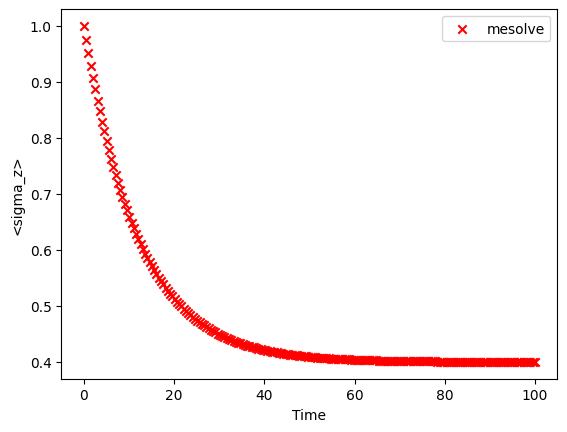

In [5]:
#pop_q1_ind = res.expect[0]  # Convert <σz> to |1⟩ population
pop_q1_ind = (1 + res.expect[0]) / 2  # Convert <σz> to |1⟩ population


plt.scatter(tlist, pop_q1_ind, c="r", marker="x", label="mesolve")
plt.xlabel("Time"), plt.ylabel("<sigma_z>")
plt.legend()
plt.show()

In [6]:
# Fitting function for T1 decay
def exp_decay(t, a, T1, c):
    return a * np.exp(-t / T1) + c


# Fit T1 for Qubit 1 (individual)
popt_q1_t1_ind, _ = curve_fit(exp_decay, tlist, pop_q1_ind, p0=[1.0, 20, 0])
T1_q1_ind = popt_q1_t1_ind[1]

print(T1_q1_ind)



12.000018018273956


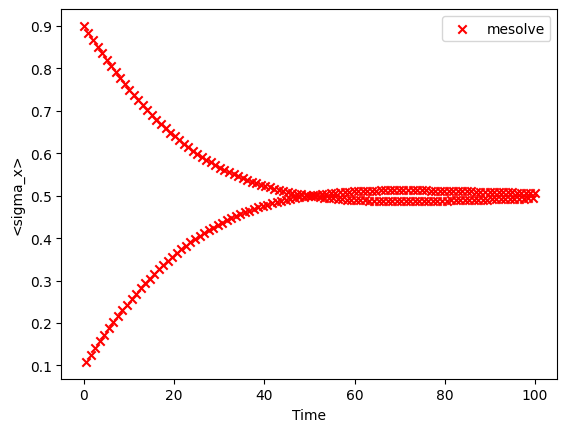

In [9]:
# T2 for Qubit 1 (individual)
psi0 = (2 * basis(2, 1) + basis(2, 0)).unit()
#psi0 = tensor(sigmam()*basis(2,0), basis(2, 1), basis(2, 1))  # |+⟩|0⟩|0⟩

res = mesolve(H, psi0, tlist, c_ops, e_ops=[sigmaz(), sigmax()])

#pop_q1_ind = res.expect[1]  # Convert <σz> to |1⟩ population
pop_q1_ind = (1 + res.expect[1]) / 2  # Convert <σz> to |1⟩ population


plt.scatter(tlist, pop_q1_ind, c="r", marker="x", label="mesolve")
plt.xlabel("Time"), plt.ylabel("<sigma_x>")
plt.legend()
plt.show()

In [8]:
# Fit T1 for Qubit 1 (individual)
popt_q1_t1_ind, _ = curve_fit(exp_decay, tlist, pop_q1_ind, p0=[1.0, 20, 0])
T1_q1_ind = popt_q1_t1_ind[1]

print(T1_q1_ind)

0.022488932112775733


C:\Users\jayamao\AppData\Local\Temp\ipykernel_24796\1336393687.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_q1_t1_ind, _ = curve_fit(exp_decay, tlist, pop_q1_ind, p0=[1.0, 20, 0])


In [127]:
# Angle
theta = 0.2 * np.pi

# Hamiltonian
H = delta * (np.cos(theta) * sigmaz() + np.sin(theta) * sigmax())

# Obtain Time Evolution
tlist = np.linspace(0, 5, 1000)
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])

c:\Users\jayamao\.conda\envs\qiskit\lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


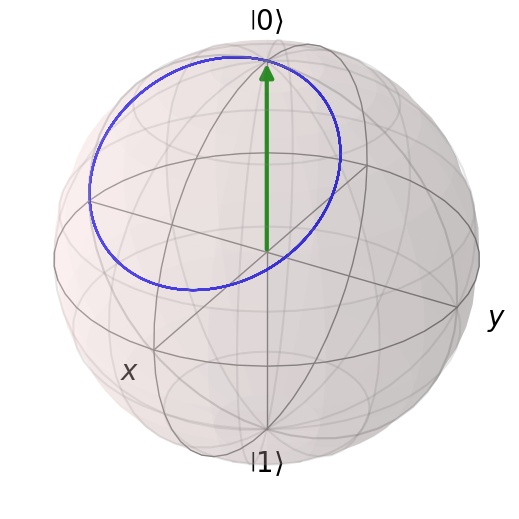

In [8]:
# Extract expectation values for pauli matrices
exp_sx_circ, exp_sy_circ, exp_sz_circ = result.expect
exp_sx_circ, exp_sy_circ, exp_sz_circ = (
    np.array(exp_sx_circ),
    np.array(exp_sy_circ),
    np.array(exp_sz_circ),
)

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_circ, exp_sy_circ, exp_sz_circ], meth="l")
sphere.add_states(psi0)
sphere.show()

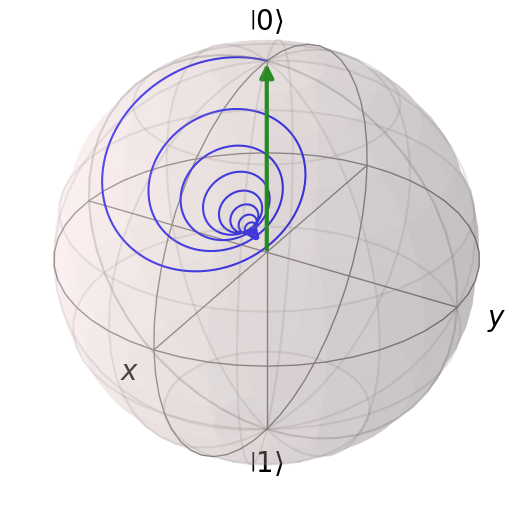

In [9]:
gamma_phase = 0.5
c_ops = [np.sqrt(gamma_phase) * sigmaz()]

# solve dynamics
result = mesolve(H, psi0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])
exp_sx_dephase, exp_sy_dephase, exp_sz_dephase = result.expect
exp_sx_dephase, exp_sy_dephase, exp_sz_dephase = (
    np.array(exp_sx_dephase),
    np.array(exp_sy_dephase),
    np.array(exp_sz_dephase),
)

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_dephase, exp_sy_dephase, exp_sz_dephase], meth="l")
sphere.add_states(psi0)
sphere.show()

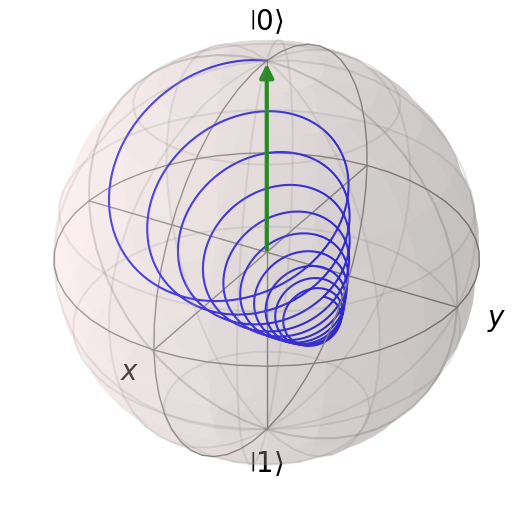

In [10]:
gamma_relax = 0.5
c_ops = [np.sqrt(gamma_relax) * sigmam()]

# solve dynamics
result = mesolve(H, psi0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])
exp_sx_relax, exp_sy_relax, exp_sz_relax = result.expect

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_relax, exp_sy_relax, exp_sz_relax], meth="l")
sphere.add_states(psi0)
sphere.show()

In [12]:
plt.scatter(tlist, result.expect[0], c="r", marker="x", label="mesolve")
plt.xlabel("Time"), plt.ylabel("<sigma_z>")
plt.legend();

ValueError: s must be a scalar, or float array-like with the same size as x and y

In [95]:
print(identity(2))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0.]
 [0. 1.]]


In [194]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, basis, bloch_redfield_tensor, brmesolve, expect, destroy, 
                   hinton, liouvillian, mesolve, plot_expectation_values,
                   sigmam, sigmax, sigmay, sigmaz, steadystate, anim_hinton)
# set a parameter to see animations in line
from matplotlib import rc
rc('animation', html='jshtml')

%matplotlib inline

In [198]:
epsilon = 0.5 * 2 * np.pi
gamma = 0.25
times = np.linspace(0, 10, 100)

# Setup Hamiltonian and initial state
H = epsilon / 2 * sigmaz()
psi0 = (2 * basis(2, 0) + basis(2, 1)).unit()
#psi0 = basis(2, 0)

# Setup the master equation solver
c_ops = [np.sqrt(gamma) * sigmam()]
e_ops = [sigmax(), sigmay(), sigmaz()]

In [199]:
result_me = mesolve(H, psi0, times, c_ops, e_ops)

c:\Users\jayamao\.conda\envs\qiskit\lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


In [200]:
a_op = [sigmax(), lambda w: gamma * (w > 0.0)]

result_brme = brmesolve(H, psi0, times, [a_op], e_ops)

c:\Users\jayamao\.conda\envs\qiskit\lib\site-packages\qutip\solver\brmesolve.py:169: FutureWarning: c_ops, e_ops, args and options will be keyword only from qutip 5.3
  warnings.warn(


In [201]:
fig, axes = plot_expectation_values(
    [result_me, result_brme], ylabels=["<X>", "<Y>", "<Z>"]
)
for ax in axes:
    ax.legend(['mesolove', 'brmesolve'], loc='upper right')

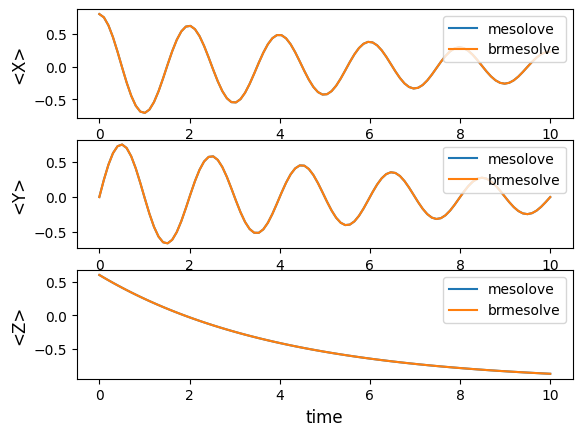

In [202]:
plt.show()

In [197]:
from qutip import snot

print(snot())

ImportError: cannot import name 'snot' from 'qutip' (c:\Users\jayamao\.conda\envs\qiskit\lib\site-packages\qutip\__init__.py)

In [ ]:
pip install qtt

^C
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'qtt' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'qtt'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'qilib' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'qilib'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'pyzmqrpc' using the legacy setup.py bdist_wheel mechanism, which will b

     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     -- ------------------------------------- 2.4/42.8 MB 12.2 MB/s eta 0:00:04
     ---- ----------------------------------- 4.7/42.8 MB 11.9 MB/s eta 0:00:04
     ------ --------------------------------- 7.3/42.8 MB 11.9 MB/s eta 0:00:03
     --------- ------------------------------ 9.7/42.8 MB 11.8 MB/s eta 0:00:03
     ----------- --------------------------- 12.3/42.8 MB 11.9 MB/s eta 0:00:03
     ------------- ------------------------- 14.4/42.8 MB 11.9 MB/s eta 0:00:03
     --------------- ----------------------- 16.8/42.8 MB 11.9 MB/s eta 0:00:03
     ---------------- ---------------------- 18.1/42.8 MB 11.0 MB/s eta 0:00:03
     ------------------ -------------------- 20.7/42.8 MB 11.0 MB/s eta 0:00:03
     --------------------- ----------------- 23.1/42.8 MB 11.1 MB/s eta 0:00:02
     ----------------------- --------------- 25.7/42.8 MB 11.2 MB/s eta 0:00:02
     ------------------------- ------------- 28.

In [204]:
import qtt 

AttributeError: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.